<a href="https://colab.research.google.com/github/ShineySun/KalmanFilter_2019/blob/master/simple_kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
## 2020 02 07
## Simple Kalman FIlter Practice Code
## KMU FOSCAR - UROP GPS & IMU Localization Project


import numpy as np
import matplotlib.pyplot as plt

# Generate Input Data
def getVolt():
  w = 0 + 4*np.random.randn(1) 
  #print(w)
  z = 14.4 + w;

  return z

# test
z = getVolt()

print("Test Print",z)


Test Print [19.27935018]


In [67]:
A = -1
H = -1
Q = -1
R = -1
x = -1
P = -1
first_run = True

def simple_kalman(z):
  #print("kalman 들어가니?")
  global first_run
  global A
  global H
  global Q
  global R
  global x
  global P

  # Initialize System Model
  if first_run:
    A = 1
    H = 1
    Q = 0
    R = 4
    x = 14
    # x = 0
    P = 6
    first_run = False

  # p 는 predict  의 약자
  # 추정값 예측 
  x_p = A*x
  #print("x_p : ", x_p)

  # 오차 공분산 예측
  P_p = A*P*np.transpose(A)
  #print("P_p : ", P_p)

  # 칼만 이득 계산
  # K = P_p*np.transpose(H)*np.linalg.inv(H*P_p*np.transpose(H)+R)
  # 1차 행렬의 역함수는 1/m
  K = P_p*np.transpose(H)/(H*P_p*np.transpose(H)+R)
  #print(K)

  # 추정값 계산
  x = x_p + K*(z - H*x_p)
  # 오차 공분산 계산
  P = P_p - K*H*P_p
  
  return x

volt = simple_kalman(z)

print("Test Print", volt)


Test Print 5.582342000000001


In [0]:
### Test Program

dt = 0.2
t = np.arange(0,10,0.2)

N_samples = len(t)
#print(N_samples)

x_saved = np.zeros(N_samples)
z_saved = np.zeros(N_samples)

for i in range(N_samples):
  z1 = getVolt()
  #print(z)
  volt = simple_kalman(z1)
  #print(volt)

  x_saved[i] = volt
  z_saved[i] = z1

 # print(x_saved)


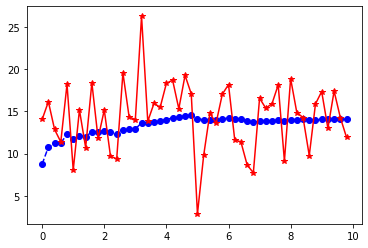

In [69]:
plt.figure(1)

# filtering data
plt.plot(t,x_saved,'bo--')
# raw data
plt.plot(t,z_saved,"r*-")

In [70]:
!ls

sample_data  stop.dat


In [0]:
## 2020 02 10
## Simple Kalman FIlter Practice Code
## KMU FOSCAR - UROP GPS & IMU Localization Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add Imu acc data file
data = pd.read_csv('stop.dat',
                   sep=' ',
                   names = ['x_speed','y_speed','z_speed'],
                   engine='python',)


In [72]:
print(data.head())

   x_speed  y_speed  z_speed
0      0.0      0.0      0.0
1      0.0      0.0      0.0
2      0.0      0.0      0.0
3      0.0      0.0      0.0
4      0.0      0.0      0.0


In [73]:
data.head(7)

,x_speed,y_speed,z_speed
0,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000
5,-0.00981,-0.01962,-0.01962
6,0.00000,0.00981,0.00981


In [0]:
# for i in range(20):
#   print(data['speed'][i])

In [92]:
# 3 * x , y, z
print(data.size)

2409


In [93]:
A = -1
H = -1
Q = -1
R = -1
x = -1
P = -1
first_run = True

def simple_kalman_imu(z):
  #print("kalman 들어가니?")
  global first_run
  global A
  global H
  global Q
  global R
  global x
  global P

  # Initialize System Model
  if first_run:
    A = 1
    H = 1
    Q = 0
    R = 4
    # x = 14
    x = 0.0
    P = 6
    first_run = False

  # p 는 predict  의 약자
  # 추정값 예측 
  x_p = A*x
  #print("x_p : ", x_p)

  # 오차 공분산 예측
  P_p = A*P*np.transpose(A)
  #print("P_p : ", P_p)

  # 칼만 이득 계산
  # K = P_p*np.transpose(H)*np.linalg.inv(H*P_p*np.transpose(H)+R)
  # 1차 행렬의 역함수는 1/m
  K = P_p*np.transpose(H)/(H*P_p*np.transpose(H)+R)
  #print(K)

  # 추정값 계산
  x = x_p + K*(z - H*x_p)
  # 오차 공분산 계산
  P = P_p - K*H*P_p
  
  return x

volt = simple_kalman(z)

print("Test Print", volt)


Test Print 0.011772


In [94]:
### Test Program

dt = 0.02
t = np.arange(0,10,0.02)

N_samples = data.size//3
print("Data Size : ", N_samples)

x_saved = np.zeros(500)
z_saved = np.zeros(500)

for i in range(500):
  z1 = data['x_speed'][i]
  #print(z1)
  #print(type(z1))
  z = float(z1)
  #print(type(z1))
  
  acc = simple_kalman_imu(z)
  #print(volt)

  x_saved[i] = acc
  z_saved[i] = z1

 # print(x_saved)


Data Size :  803


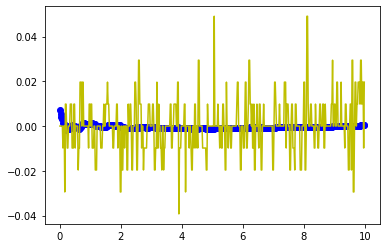

In [95]:
plt.figure(1)

# filtering data
plt.plot(t,x_saved,'bo--')
# raw data
plt.plot(t,z_saved,"y-")